In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


## Preprocesado de datos

##### En este apartado, en primer lugar cargaremos las primersa líbrerias y tambíen  los datos.

##### El segundo paso es visualizar los datos y gestionar los nulos de la mejor forma posible.

**TIP :** *Para que tu codigo sea más eficaz y en casa de necesitarlo realizar futuras actualizaciones es recomendable el uso de funciones*

In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test= pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

Visualizamos como es el dataframe

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
def preprocesado(df):
    df=df.drop(['Alley'], axis=1) # Eliminamos la columna Alley
    df=df.dropna(subset=['MasVnrType']) # Eliminamos las filas con nulos
    df['BsmtFinType2']=df['BsmtFinType2'].fillna('Unf') # Asumimos los nulos como Unf (Sin terminar)
    df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median()) # Imputamos los nulos con la mediana
    df['BsmtQual']=df['BsmtQual'].fillna(0) # Imputamos los nulos por 0 (No tienen sotano)
    df['BsmtCond']=df['BsmtCond'].fillna(0) # Imputamos los nulos por 0 (No tienen sotano)
    df['BsmtExposure']=df['BsmtExposure'].fillna(0) # Imputamos los nulos por 0 (No tienen sotano)
    df['BsmtFinType1']=df['BsmtFinType1'].fillna(0) # Imputamos los nulos por 0 (No tienen sotano)
    df=df.dropna(subset=['Electrical']) # Eliminamos el error en Electrical
    df['FireplaceQu']=df['FireplaceQu'].fillna(0) # Imputamos los nulos por 0 (No tienen chimenea)
    df['GarageType']=df['FireplaceQu'].fillna('NonHave') # Imputamos los nulos por 'NonHave' (No tienen garaje)
    df['GarageYrBlt']=df['GarageYrBlt'].fillna(0) # Imputamos los nulos por 0 (Indicamos que los que no tienen garaje)
    df['GarageFinish']=df['GarageFinish'].fillna('NonHave') # Imputamos los nulos por 'NonHave' (No tienen garaje)
    df['GarageQual']=df['GarageQual'].fillna(0) # Indicamos que el garaje no existe
    df['GarageCond']=df['GarageCond'].fillna(0) # Indicamos que el garaje no existe
    df=df.drop(['PoolQC'], axis=1) # Eliminamos la columna Calidad de la piscina (Praticamente toda vacia)
    df['MiscFeature']=df['MiscFeature'].fillna('NonHave') # Indicamos que no tiene características extras
    df['Fence']=df['Fence'].fillna('NonHave') # Indicamos que no tiene vallas
    return df

In [6]:
train=preprocesado(train)

## Features Selection

##### En esta sección vamos a seleccionar solo las variables que creamos que tienen sentido para nuestro modelo, cada elección tiene que tener un porque.
##### Sobrecargar un modelo puede provocar largos periodos de espera y hacer que nuestro modelo no encuentre las mejores relaciones.

*Es necesario leerse el apartado Data Field de la página '[Datos](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)' de la descripción de la competición*

In [7]:
features=['MSSubClass','MSZoning','LandContour','Utilities','LotConfig','Neighborhood','BldgType','HouseStyle','OverallQual','OverallCond','YearRemodAdd','ExterQual','ExterCond','BsmtCond','Heating','HeatingQC','CentralAir','Electrical','GrLivArea','FullBath','KitchenQual','TotRmsAbvGrd','FireplaceQu','GarageCars','GarageCond','Fence','MiscVal','SaleType','SaleCondition']
target=['SalePrice']

In [8]:
def select_features(df):
    train_df=df[features+target]
    return train_df

In [9]:
train_df=select_features(train)

### Modelado con PCA

In [10]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
train_df.mean(axis=0)

----------------------
Media de cada variable
----------------------


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


MSSubClass          56.933150
OverallQual          6.093728
OverallCond          5.579600
YearRemodAdd      1984.760165
GrLivArea         1514.174363
FullBath             1.562371
TotRmsAbvGrd         6.516885
GarageCars           1.764990
MiscVal             43.758787
SalePrice       180624.101999
dtype: float64

In [11]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
train_df.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


MSSubClass      1.793553e+03
OverallQual     1.908450e+00
OverallCond     1.239694e+00
YearRemodAdd    4.264776e+02
GrLivArea       2.764651e+05
FullBath        3.028313e-01
TotRmsAbvGrd    2.645749e+00
GarageCars      5.605941e-01
MiscVal         2.476540e+05
SalePrice       6.290414e+09
dtype: float64

In [12]:
#Normalizamos las variable numéricas
def minmax_norm(df):
    return (df - df.min()) / ( df.max() - df.min())

num_cols=train_df.select_dtypes(exclude=['object'])
num_cols=num_cols.columns.to_list()
num_cols.remove('SalePrice')
train_df[num_cols] = minmax_norm(train_df[num_cols])
train_df[num_cols]

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,MSSubClass,OverallQual,OverallCond,YearRemodAdd,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,MiscVal
0,0.235294,0.666667,0.500,0.883333,0.259231,0.666667,0.500000,0.50,0.00000
1,0.000000,0.555556,0.875,0.433333,0.174830,0.666667,0.333333,0.50,0.00000
2,0.235294,0.666667,0.500,0.866667,0.273549,0.666667,0.333333,0.50,0.00000
3,0.294118,0.666667,0.500,0.333333,0.260550,0.333333,0.416667,0.75,0.00000
4,0.235294,0.777778,0.500,0.833333,0.351168,0.666667,0.583333,0.75,0.00000
...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.555556,0.500,0.833333,0.247362,0.666667,0.416667,0.50,0.00000
1456,0.000000,0.555556,0.625,0.633333,0.327619,0.666667,0.416667,0.50,0.00000
1457,0.294118,0.666667,1.000,0.933333,0.377920,0.666667,0.583333,0.25,0.16129
1458,0.000000,0.444444,0.625,0.766667,0.140166,0.333333,0.250000,0.25,0.00000


In [13]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(PCA())
pca_pipe.fit(train_df[num_cols])

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [14]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = train_df[num_cols].columns
)

,MSSubClass,OverallQual,OverallCond,YearRemodAdd,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,MiscVal
0,-0.057086,-0.286445,0.006607,-0.833504,-0.130784,-0.307091,-0.139739,-0.298292,0.001516
1,0.979655,0.002226,-0.067351,-0.110657,0.044947,0.126297,0.049899,-0.055019,-0.000985
2,0.138499,-0.252280,0.251395,0.502777,-0.277908,-0.435326,-0.381021,-0.435037,0.003509
3,-0.076017,-0.043697,0.523225,-0.004938,0.240881,0.350535,0.436419,-0.588948,0.017410
4,0.106423,0.196077,0.734819,-0.121414,0.074764,-0.391056,0.077003,0.480656,0.007300
5,0.015464,0.405558,-0.329903,0.068335,0.260641,-0.625154,0.438126,-0.266592,-0.000688
6,0.019613,-0.792708,-0.096459,0.143619,0.115043,-0.177916,0.476225,0.263701,0.009029
7,-0.010289,-0.145174,-0.011095,0.013364,0.870571,-0.044288,-0.465615,-0.014396,-0.040716
8,0.000527,0.002179,-0.015256,-0.000343,0.031097,-0.001760,-0.029550,0.005525,0.998944


In [15]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.4718856  0.66755337 0.81348341 0.87763859 0.93105835 0.96296426
 0.99123986 0.99682255 1.        ]


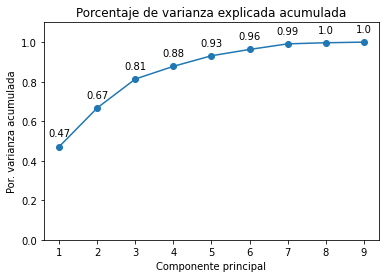

In [16]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(train_df[num_cols].columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(train_df[num_cols].columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [17]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=train_df[num_cols])
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9'],
    index   = train_df[num_cols].index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.368159,0.012157,-0.034693,0.034128,-0.085034,0.042701,0.023795,-0.042558,-0.004027
1,0.088984,-0.206169,-0.084268,0.162234,0.179188,-0.255483,-0.082622,-0.030056,-0.007660
2,-0.332849,0.006328,0.016451,-0.035077,-0.094774,-0.027727,-0.056322,0.047286,0.001349
3,0.126174,0.070692,-0.235339,-0.267760,0.232201,0.111597,0.031655,0.000599,0.000664
4,-0.456552,0.012473,-0.253924,-0.059203,0.076277,0.078171,0.044723,-0.021720,-0.001990


In [18]:
train_df=pd.concat([train_df, proyecciones], axis=1,)


In [19]:
train_df=train_df.drop(num_cols,axis=1)
train_df['PC1']

0      -0.368159
1       0.088984
2      -0.332849
3       0.126174
4      -0.456552
          ...   
1455   -0.281459
1456   -0.110996
1457   -0.362238
1458    0.034440
1459    0.449053
Name: PC1, Length: 1451, dtype: float64

In [20]:
train_df

,MSZoning,LandContour,Utilities,LotConfig,Neighborhood,BldgType,HouseStyle,ExterQual,ExterCond,BsmtCond,...,SalePrice,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,RL,Lvl,AllPub,Inside,CollgCr,1Fam,2Story,Gd,TA,TA,...,208500,-0.368159,0.012157,-0.034693,0.034128,-0.085034,0.042701,0.023795,-0.042558,-0.004027
1,RL,Lvl,AllPub,FR2,Veenker,1Fam,1Story,TA,TA,TA,...,181500,0.088984,-0.206169,-0.084268,0.162234,0.179188,-0.255483,-0.082622,-0.030056,-0.007660
2,RL,Lvl,AllPub,Inside,CollgCr,1Fam,2Story,Gd,TA,TA,...,223500,-0.332849,0.006328,0.016451,-0.035077,-0.094774,-0.027727,-0.056322,0.047286,0.001349
3,RL,Lvl,AllPub,Corner,Crawfor,1Fam,2Story,TA,TA,Gd,...,140000,0.126174,0.070692,-0.235339,-0.267760,0.232201,0.111597,0.031655,0.000599,0.000664
4,RL,Lvl,AllPub,FR2,NoRidge,1Fam,2Story,Gd,TA,TA,...,250000,-0.456552,0.012473,-0.253924,-0.059203,0.076277,0.078171,0.044723,-0.021720,-0.001990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Lvl,AllPub,Inside,Gilbert,1Fam,2Story,TA,TA,TA,...,175000,-0.281459,0.012751,0.003249,0.000003,-0.108054,-0.045382,0.063642,0.001372,-0.002159
1456,RL,Lvl,AllPub,Inside,NWAmes,1Fam,1Story,TA,TA,TA,...,210000,-0.110996,-0.200437,-0.120774,0.103612,-0.010959,-0.083007,0.027479,0.069602,-0.001625
1457,RL,Lvl,AllPub,Inside,Crawfor,1Fam,2Story,Ex,Gd,Gd,...,266500,-0.362238,0.053664,0.168879,0.506025,0.178869,0.016058,-0.027229,0.013515,0.149326
1458,RL,Lvl,AllPub,Inside,NAmes,1Fam,1Story,TA,TA,TA,...,142125,0.034440,-0.260524,0.343760,0.020311,-0.065595,0.034196,0.027151,0.020288,-0.003612


### Enoding V. Categóricas

In [21]:
train_df['Fence'].value_counts()

NonHave    1170
MnPrv       157
GdPrv        59
GdWo         54
MnWw         11
Name: Fence, dtype: int64

In [22]:
train_df['BsmtCond']=train_df['BsmtCond'].replace(0,'NonHave')
train_df['FireplaceQu']=train_df['FireplaceQu'].replace(0,'NonHave')
train_df['GarageCond']=train_df['GarageCond'].replace(0,'NonHave')

In [23]:
object_cols=train_df.select_dtypes(include=['object'])
object_cols=object_cols.columns.to_list()
ordinal_cols=['Utilities','ExterQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu',
              'GarageCond','Fence']
object_cols = [i for i in object_cols if i not in ordinal_cols]
object_cols

['MSZoning',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'ExterCond',
 'Heating',
 'CentralAir',
 'Electrical',
 'SaleType',
 'SaleCondition']

In [24]:
# Codificación lineal
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
train_df[ordinal_cols] = ordinal_encoder.fit_transform(train_df[ordinal_cols])

In [25]:
# ONE HOT Encoding
train_df=pd.get_dummies(data=train_df, columns=object_cols)

In [26]:
train_df.head()

,Utilities,ExterQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageCond,Fence,SalePrice,PC1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,2.0,4.0,0.0,2.0,3.0,5.0,4.0,208500,-0.368159,...,0,0,0,1,0,0,0,0,1,0
1,0.0,3.0,4.0,0.0,3.0,5.0,5.0,4.0,181500,0.088984,...,0,0,0,1,0,0,0,0,1,0
2,0.0,2.0,4.0,0.0,2.0,5.0,5.0,4.0,223500,-0.332849,...,0,0,0,1,0,0,0,0,1,0
3,0.0,3.0,1.0,2.0,2.0,2.0,5.0,4.0,140000,0.126174,...,0,0,0,1,1,0,0,0,0,0
4,0.0,2.0,4.0,0.0,2.0,5.0,5.0,4.0,250000,-0.456552,...,0,0,0,1,0,0,0,0,1,0


In [27]:
features=train_df.columns.tolist()
features.remove('SalePrice')
features.remove('PC9')
features

['Utilities',
 'ExterQual',
 'BsmtCond',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageCond',
 'Fence',
 'PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_St

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df[features], train_df[target], test_size=0.2, random_state=123)

## Técnicas multiples de regresión 

### Regresión lineal multiple

In [29]:
from sklearn.linear_model import LinearRegression

linearregress = LinearRegression()

linearregress.fit(X_train, y_train)

LinearRegression()

In [30]:
from sklearn.metrics import mean_absolute_error

predicted_linear = linearregress.predict(X_test)
linear_error=mean_absolute_error(y_test, predicted_linear)
linear_error

13808972994806.707

### Árbol de decisión

In [31]:
from sklearn.tree import DecisionTreeRegressor

treeregress = DecisionTreeRegressor(random_state=123)

treeregress.fit(X_train, y_train)

DecisionTreeRegressor(random_state=123)

In [32]:
from sklearn.metrics import mean_absolute_error

predicted_tree = treeregress.predict(X_test)
tree_error=mean_absolute_error(y_test, predicted_tree)
tree_error

28880.680412371134

### Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor
randomregress = RandomForestRegressor(random_state=123)

randomregress.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(random_state=123)

In [34]:
predicted_random = randomregress.predict(X_test)
random_error=mean_absolute_error(y_test, predicted_random)
random_error

20695.738555473738

### XG REGRESSOR

In [35]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RepeatedKFold
import multiprocessing

In [36]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'max_depth'        : [3, 5, 10, 20],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.01, 0.1],
              'booster'          : ['gbtree']
             }


# Crear conjunto de validación
# ==============================================================================
np.random.seed(123)
idx_validacion = np.random.choice(
                    X_train.shape[0],
                    size= int(X_train.shape[0]*0.1),
                    replace=False
                 )

X_val = X_train.iloc[idx_validacion, :].copy()
y_val = y_train.iloc[idx_validacion].copy()

X_train_grid = X_train.reset_index(drop = True).drop(idx_validacion, axis = 0).copy()
y_train_grid = y_train.reset_index(drop = True).drop(idx_validacion, axis = 0).copy()

# XGBoost necesita pasar los paramétros específicos del entrenamiento al llamar
# al método .fit()
fit_params = {"early_stopping_rounds" : 5, 
              "eval_metric"           : "rmse", 
              "eval_set"              : [(X_val, y_val)],
              "verbose"               : 0
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = XGBRegressor(
                        n_estimators = 1000,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'neg_mean_absolute_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train, **fit_params)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/p

,param_booster,param_learning_rate,param_max_depth,param_subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
2,gbtree,0.01,5,0.5,-19340.720461,822.520351,-9680.194282,1657.377586
4,gbtree,0.01,10,0.5,-19343.948903,852.668956,-4293.467504,1416.791866
6,gbtree,0.01,20,0.5,-19439.028936,814.182529,-2578.615704,1611.279401
9,gbtree,0.1,3,1,-20056.919672,492.541038,-6088.277764,3773.404874


In [37]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

# Número de árboles del modelo final (early stopping)
# ==============================================================================
n_arboles_incluidos = len(grid.best_estimator_.get_booster().get_dump())
print(f"Número de árboles incluidos en el modelo: {n_arboles_incluidos}")

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 5, 'subsample': 0.5} : -19340.72046077234 neg_mean_absolute_error
Número de árboles incluidos en el modelo: 925


In [38]:
XGregress = grid.best_estimator_
predicted_XG = XGregress.predict(X_test)
XG_error=mean_absolute_error(y_test, predicted_XG)
XG_error

18822.256604381444

### LightGBM

*Añadimos GridSearchCV

In [39]:
from lightgbm.sklearn import LGBMRegressor


In [40]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators'     : [100, 500, 1000, 5000],
              'max_depth'        : [5, 10, 20],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.01, 0.1],
              'boosting_type'    : ['gbdt']
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = LGBMRegressor(random_state=123),
        param_grid = param_grid,
        scoring    = 'neg_mean_absolute_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_boosting_type,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
12,gbdt,0.01,10,1000,0.5,-20661.058998,1243.975119,-8943.608513,45.749084
13,gbdt,0.01,10,1000,1,-20661.058998,1243.975119,-8943.608513,45.749084
24,gbdt,0.1,5,100,0.5,-20709.003234,1125.829433,-11949.610927,156.491177
25,gbdt,0.1,5,100,1,-20709.003234,1125.829433,-11949.610927,156.491177


In [41]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'boosting_type': 'gbdt', 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000, 'subsample': 0.5} : -20661.058998290544 neg_mean_absolute_error


In [42]:
Light_regress = grid.best_estimator_
predicted_Light = Light_regress.predict(X = X_test,)
Light_error=mean_absolute_error(y_test, predicted_Light)
Light_error

19920.59479142774

In [43]:
from sklearn.inspection import permutation_importance
importancia = permutation_importance(
                estimator    = Light_regress,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
8,53662.846328,1260.009115,PC1
10,18793.472946,445.169936,PC3
15,8896.400791,446.957205,PC8
13,4822.724004,117.205254,PC6
12,4239.284592,149.175982,PC5
...,...,...,...
32,0.000000,0.000000,Neighborhood_BrDale
75,0.000000,0.000000,Heating_GasW
76,0.000000,0.000000,Heating_Grav
77,0.000000,0.000000,Heating_OthW
